# Einleitung

Die Riemann-Zeta-Funktion wird wie folgt definiert $\zeta(s)=\sum\nolimits_{n=1}^\infty\frac{1}{n^s}=\frac{1}{1^s}+\frac{1}{2^s}+\frac{1}{3^s}+...$\
Es gibt im Allgemeinen viele Varianten die Riemann-Zeta-Funktion numerisch zu beschreiben. Wir verwenden hier die Methode über die Konvergenz von alternierenden Reihen.\
Zudem wird ein Beispiel dargestellt warum eine numerische Annäherung verwendet werden sollte. In diesem Fall beschäftigen wie uns mit der Riemann-Zeta-Funktion im Bezug auf $\zeta(2)$.

# Einfache Summe

In [18]:
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt


#Entwicklungspunkt von Zeta
s = 2
zeta_1 = 0
eps = 1*10**(-15)
N_1= 10**15


for n in range(1,N_1+1):
    zeta_2=zeta_1
    zeta_1=zeta_1+(1/n**s)
    if abs(zeta_2-zeta_1)<eps:
        print('Durchlauf: ', n)
        print('Zeta_2: ',zeta_2)
        print('Zeta_1: ',zeta_1)
        print('Delta: ',1/n**s)
        print('Difference: ',zeta_1-zeta_2)
        print('$2*\Pi/6:$',np.pi**2/6)
        break

zeta_1 = 0
for m in range(n,1,-1):
    zeta_2=zeta_1
    zeta_1=zeta_1+(1/m**s)
print('Zeta_2: ',zeta_2)
print('Zeta_1: ',zeta_1)
print('Delta: ',1/m**s)
print('Difference: ',zeta_1-zeta_2)
print('$2*\Pi/6:$',np.pi**2/6)


Durchlauf:  31635422
Zeta_2:  1.6449340353029747
Zeta_1:  1.6449340353029756
Delta:  9.992007142506634e-16
Difference:  8.881784197001252e-16
$2*\Pi/6:$ 1.6449340668482264
Zeta_2:  0.3949340352380906
Zeta_1:  0.6449340352380906
Delta:  0.25
Difference:  0.24999999999999994
$2*\Pi/6:$ 1.6449340668482264


Es ist zu erkennen dass die Differenz zwischen Zeta_1 und Zeta_2 nicht dem hinzuaddierten Term entspricht. Somit ist davon auszugehen dass die Maschinengenauigkeit nicht ausreicht um über einfache Summation die gewünschte Genauigkeit zu erhalten.
Außerdem ist von vorne herein klar, dass für eine Genauigkeit von $10^{-16}$ eine Anzahl im Bereich von $10^{8}$ Summanden benötigt wird da der Nenner der Riemann Zeta Funktion eine quadratische Funktion von n ist. 

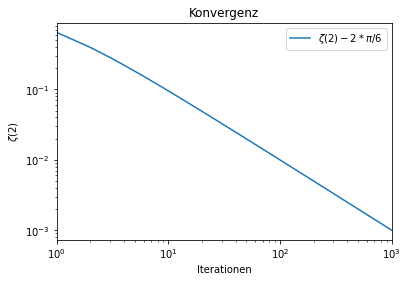

In [4]:
def Zeta(N):
    zeta_1=0
    for n in range(1,N+1):
        zeta_2=zeta_1
        zeta_1=zeta_1+(1/n**s)
    return zeta_1
    
N=range(1,1000)

#Plot
plt.plot(N,[abs(Zeta(n)-np.pi**2/6) for n in N],label='$\zeta(2)-2*\pi/6$')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Iterationen')
plt.ylabel('$\zeta(2)$')
plt.title('Konvergenz')


plt.xlim(1,10**3)

# show a legend on the graph
plt.legend()

# show graph
plt.show()


# Fortgeschrittene Mittelwertbildung

Schnellere Konvergenz von Thermen

In [5]:
s = 2

#Verwende alternierende Reihe (-> Dirichlet Etafunktion)
eta_1 = 0
eps = 1*10**(-15)
S = 0

N_1= 10**15

for n in range(1,N_1+1):
    eta_2 = eta_1
    eta_1 = eta_1 + (-1)**(n+1)/n**s
    if abs(abs(eta_2)-abs(eta_1))<eps:
        break

print(eta_1/(1-2**(1-s)))
print(n)

1.644934066848158
30791659


In [13]:
s = 2

#Verwende alternierende Reihe (-> Dirichlet Etafunktion)
eta_1 = 0
eps = 1*10**(-15)
S_neu = 0

N_1= 10**15

for n in range(1,N_1+1):
    eta_2 = eta_1
    eta_1 = eta_1 + (-1)**(n+1)/n**s
    S_alt = S_neu
    S_neu = 1/2*(eta_1 + eta_2)
    if abs(abs(S_alt/(1-2**(1-s)))-abs(S_neu/(1-2**(1-s))))<eps:
        
        print(S_neu)
        break

print(abs(abs(S_alt/(1-2**(1-s)))-abs(S_neu/(1-2**(1-s)))))

print(S_neu/(1-2**(1-s)))
print(abs(np.pi**2/6-S_neu/(1-2**(1-s))))
print(n)

0.8224670334240956
8.881784197001252e-16
1.644934066848191
3.530509218307998e-14
118013


# Bestes Konvergenzverhalten

In [34]:
import numpy as np
import math as m

#Anfangswerte
s = 2
eps = 10**(-15)

#Berechnet Koeffizienten d
def d(k,n):
    d = 0
    for j in range(k,n+1):
        d = d + n*m.factorial(n+j-1)*4**j/(m.factorial(n-j)*m.factorial(2*j))
    return d


#Berechne die Riemann Zeta funktion
def Zeta(n):
    Zeta = 0
    for k in range(1,n+1):
        Zeta = Zeta + ((-1)**(k-1)*d(k,n))/(d(0,n)*(1-2**(1-s))*k**s)
    return Zeta

Zeta_1 = 0
for n in range(1,1000):
       Zeta_2 = Zeta_1
       Zeta_1 = Zeta(n)
       if abs(abs(Zeta_2)-abs(Zeta_1)) < eps:
           break
print(n)
print(np.pi**2/6-Zeta(18))

19
-4.440892098500626e-16


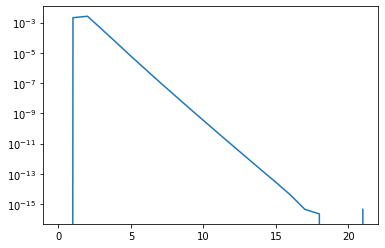

In [15]:
import matplotlib.pyplot as plt

#Betrache Konvergenzverhalten
Zeta_vals = []
for i in range(1,22+1):
    Zeta_vals.append(Zeta(i)-np.pi**2/6)
    #print(Zeta_vals)



plt.plot(Zeta_vals)
plt.yscale('log')